In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import h5py

%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
f = h5py.File('minosmatch_nukecczdefs_127x68_xuv_padded_me1Bmc.hdf5', 'r')

for name in f:
    print name

eventids
hits-u
hits-v
hits-x
planecodes
segments
zs


In [4]:
data = {'zs': f['zs'], 'segments': f['segments'], 'planecodes': f['planecodes']}
df = DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701439 entries, 0 to 1701438
Data columns (total 3 columns):
planecodes    uint16
segments      uint8
zs            float32
dtypes: float32(1), uint16(1), uint8(1)
memory usage: 24.3 MB


In [6]:
print np.max(df['planecodes']), np.min(df['planecodes'])

66 0


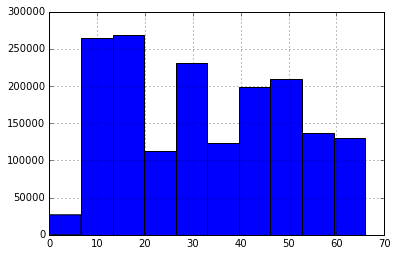

In [7]:
df['planecodes'][df['planecodes'] < 65535].hist()

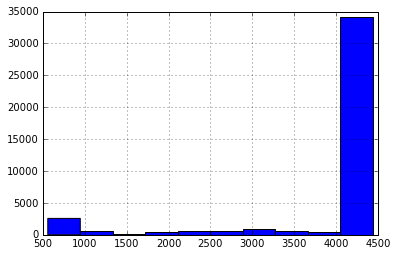

In [8]:
df['zs'][df['segments']==0].hist()

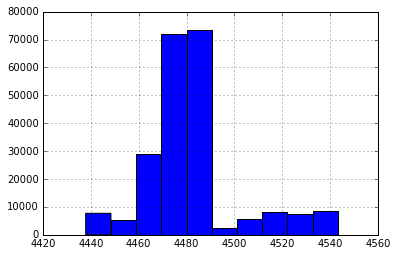

In [9]:
df['zs'][df['segments']==1].hist()

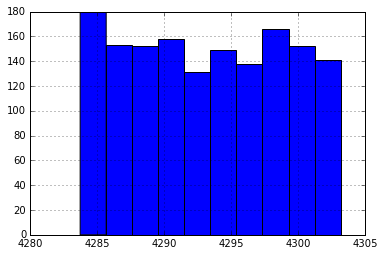

In [10]:
df['zs'][df['planecodes']==1].hist()

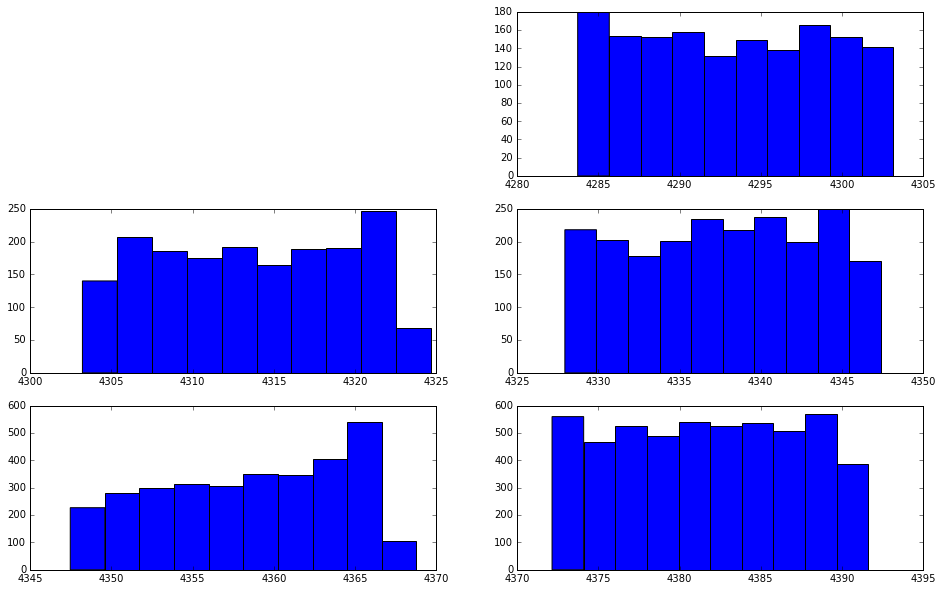

In [11]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 2)
for i in range(1, 6):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['planecodes']==i])

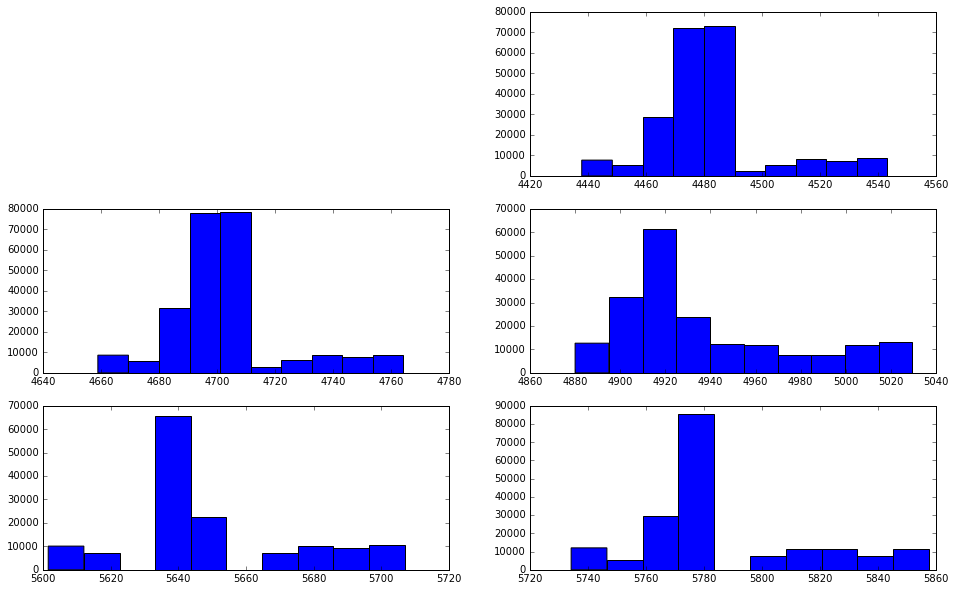

In [12]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 2)
for i in range(1, 6):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['segments']==i])

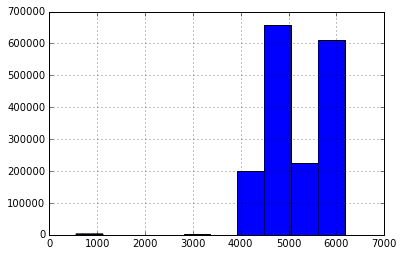

In [13]:
df['zs'].hist()

In [14]:
np.max(df['zs'][df['segments']==0])

4437.8301

In [15]:
# old style...
#target1_z = 4481.21
#target2_z = 4702.29
#target3_z = 4923.36
#target4_z = 5644.91
#target5_z = 5777.55
#target1_thickestW = 25.75
#target2_thickestW = 25.75
#target3_thickestW = 76.3
#target4_thickestW = 28.0
#target5_thickestW = 13.0
#
#extraToleranceUp=23.0
#extraToleranceDown=40.0
#
#targets_z = [target1_z, target2_z, target3_z, target4_z, target5_z]
#targets_w = [target1_thickestW, target2_thickestW, target3_thickestW, target4_thickestW, target5_thickestW]
#
#targets_zw = zip(targets_z, targets_w) 
#
#targets_bounds = [(t - w / 2.0 - extraToleranceUp, t + w / 2.0 + extraToleranceDown) for (t, w) in targets_zw]

In [16]:
target1_up_trk = 4437.83
target1_dn_trk = 4543.26

target2_up_trk = 4658.9
target2_dn_trk = 4764.33

target3_up_trk = 4879.98
target3_dn_trk = 5029.62

target4_up_trk = 5601.52
target4_dn_trk = 5706.95

target5_up_trk = 5734.17
target5_dn_trk = 5857.6
        
targets_bounds = [
    (target1_up_trk, target1_dn_trk),
    (target2_up_trk, target2_dn_trk),
    (target3_up_trk, target3_dn_trk),
    (target4_up_trk, target4_dn_trk),
    (target5_up_trk, target5_dn_trk),
]

In [17]:
for i, t in enumerate(targets_bounds):
    print i+1, t

1 (4437.83, 4543.26)
2 (4658.9, 4764.33)
3 (4879.98, 5029.62)
4 (5601.52, 5706.95)
5 (5734.17, 5857.6)


In [18]:
for i in range(11):
    print i, (np.min(df['zs'][df['segments']==i]), np.max(df['zs'][df['segments']==i]))

0 (556.388, 4437.8301)
1 (4437.8301, 4543.2598)
2 (4658.8999, 4764.3301)
3 (4879.98, 5029.6201)
4 (5601.52, 5706.9502)
5 (5734.1699, 5857.6001)
6 (4543.2598, 4658.8999)
7 (4764.3301, 4879.98)
8 (5029.6201, 5601.52)
9 (5706.9502, 5734.1699)
10 (5857.6001, 6172.29)


In [19]:
zsegs = [0, 1, 6, 2, 7, 3, 8, 4, 9, 5, 10]

In [20]:
for i in zsegs:
    print (np.min(df['zs'][df['segments']==i]), np.max(df['zs'][df['segments']==i]))

(556.388, 4437.8301)
(4437.8301, 4543.2598)
(4543.2598, 4658.8999)
(4658.8999, 4764.3301)
(4764.3301, 4879.98)
(4879.98, 5029.6201)
(5029.6201, 5601.52)
(5601.52, 5706.9502)
(5706.9502, 5734.1699)
(5734.1699, 5857.6001)
(5857.6001, 6172.29)


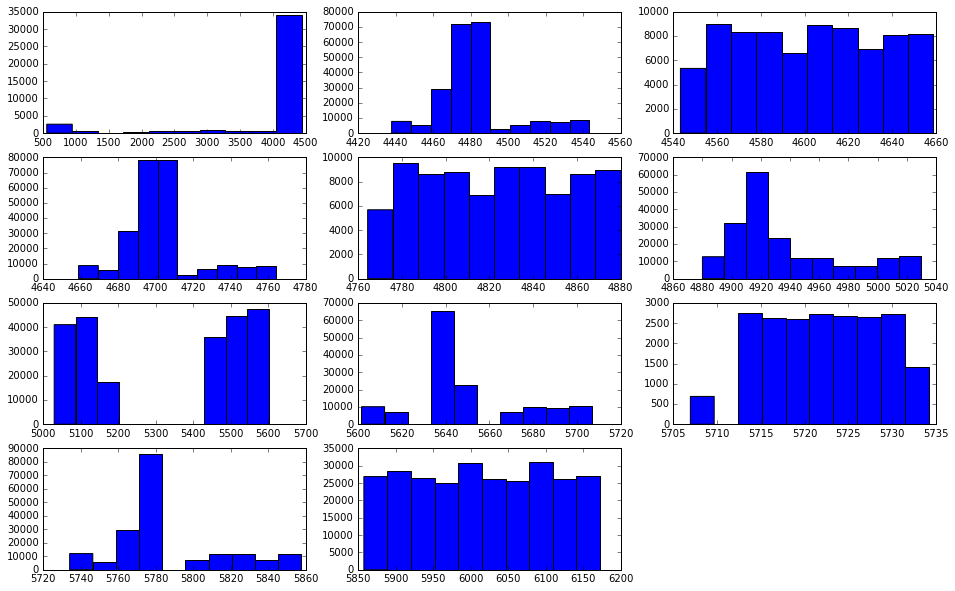

In [21]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(4, 3)
for i, v in enumerate(zsegs):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['segments']==v])